In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv("./letter-recognition.csv")

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [4]:
encoding = {chr(i): i - 64 for i in range(65, 91)}
df['encoded_alphabet']= df['letter'].map(encoding)

In [ ]:
df.columns = df.columns.str.strip()

In [96]:
X = df[['xbox','ybox','width','height','onpix','xbar','ybar','x2bar','y2bar','xybar','x2ybar',
 'xy2bar','xedge','xedgey','yedge','yedgex']]
y= df[['encoded_alphabet']].to_numpy()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22053747, test_size=0.2)

In [98]:
y_test = y_test.ravel()
y_train = y_train.ravel()

In [100]:
scaler_X = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [103]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [104]:
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [106]:
X_test_scaled = scaler.transform(X_test)

In [107]:
y_pred = svm_clf.predict(X_test_scaled)


In [108]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.94625

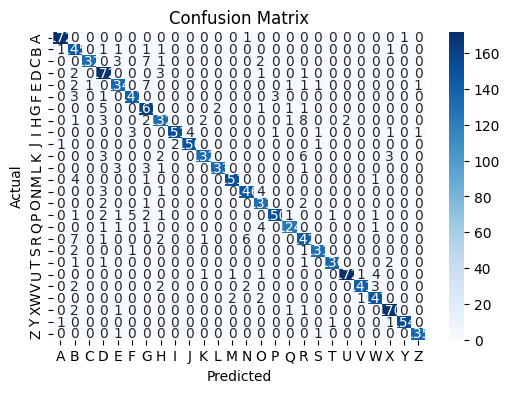

In [112]:
class_names = list(encoding.keys()) 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [114]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

           A       0.98      0.99      0.99       174
           B       0.84      0.96      0.90       151
           C       0.99      0.91      0.95       145
           D       0.88      0.96      0.92       179
           E       0.92      0.91      0.91       148
           F       0.94      0.95      0.95       148
           G       0.87      0.94      0.90       171
           H       0.90      0.87      0.89       151
           I       0.99      0.93      0.96       162
           J       0.97      0.97      0.97       154
           K       0.97      0.90      0.94       146
           L       0.99      0.94      0.96       141
           M       0.98      0.96      0.97       157
           N       0.94      0.95      0.94       154
           O       0.90      0.96      0.93       136
           P       0.97      0.91      0.94       165
           Q       0.96      0.94      0.95       132
   

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 1e-2, 1e-3],
    'kernel': ['rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.9669375


In [140]:
print(precision)
print(f1)
print(recall)

0.9481826224448482
0.9466014788213704
0.94625


In [135]:
print(classification_report(y_test, y_pred))
classification_report

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       174
           2       0.84      0.96      0.90       151
           3       0.99      0.91      0.95       145
           4       0.88      0.96      0.92       179
           5       0.92      0.91      0.91       148
           6       0.94      0.95      0.95       148
           7       0.87      0.94      0.90       171
           8       0.90      0.87      0.89       151
           9       0.99      0.93      0.96       162
          10       0.97      0.97      0.97       154
          11       0.97      0.90      0.94       146
          12       0.99      0.94      0.96       141
          13       0.98      0.96      0.97       157
          14       0.94      0.95      0.94       154
          15       0.90      0.96      0.93       136
          16       0.97      0.91      0.94       165
          17       0.96      0.94      0.95       132
          18       0.86    

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>